### Pitcher Similarity with Euclidian Distance (2018 Statcast Data)

In [2]:
import numpy as np

import pandas as pd
from pandas.api.types import CategoricalDtype

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

In [3]:
# read in statcast data
statcast = pd.read_csv('statcast_pitch_2018.csv')

In [4]:
statcast.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,barrel
0,FF,2018-04-08,93.5,-2.8990,6.0014,Brad Brach,519317,542960,strikeout,swinging_strike,...,8,7,8,8,7,7,8,Standard,Standard,NaN
1,CH,2018-04-08,86.4,-3.2825,5.6651,Brad Brach,519317,542960,NaN,called_strike,...,8,7,8,8,7,7,8,Standard,Standard,NaN
2,FF,2018-04-08,94.3,-2.3989,6.2012,Brad Brach,519317,542960,NaN,ball,...,8,7,8,8,7,7,8,Standard,Standard,NaN
3,FF,2018-04-08,93.5,-2.5249,6.2101,Brad Brach,519317,542960,NaN,foul,...,8,7,8,8,7,7,8,Standard,Standard,NaN
4,CH,2018-04-08,85.8,-3.4158,5.6694,Brad Brach,592450,542960,grounded_into_double_play,hit_into_play,...,8,7,8,8,7,7,8,Strategic,Standard,0.0


In [5]:
# get unique pitcher names
unique_names = statcast['player_name'].unique()

# sort for pitcher who have at least 150 pitches
uniq = []
for i in range(len(unique_names)):
    pitcher_df = statcast[statcast['player_name'] == unique_names[i]]
    
    if len(pitcher_df) >= 150:
        uniq.append(unique_names[i])
    else:
        None
len(uniq)

648

In [6]:
# take median release points for each pitcher 
pitch = statcast.loc[statcast['player_name'].isin(uniq)]

grouped = pitch.groupby(['player_name', 'pitch_type']).agg(np.median)
grouped.head()

release_speed  release_pos_x  release_pos_z    batter  \
player_name pitch_type                                                          
A.J. Cole   CH                   86.4       -3.16890        5.62670  592685.0   
            CU                   79.7       -3.27420        5.67940  595281.0   
            FF                   94.1       -2.87645        5.93965  571166.5   
            FT                   92.4       -2.96130        5.84180  542255.0   
            SL                   84.4       -3.15820        5.67930  541645.0   

                         pitcher  spin_dir  spin_rate_deprecated  \
player_name pitch_type                                             
A.J. Cole   CH          595918.0       NaN                   NaN   
            CU          595918.0       NaN                   NaN   
            FF          595918.0       NaN                   NaN   
            FT          595918.0       NaN                   NaN   
            SL          595918.0       NaN                   NaN   

                        break_angle_deprecated  break_length_deprecated  zone  \
player_name pitch_type                                                          
A.J. Cole   CH                             NaN                      NaN  13.0   
            CU                             NaN                      NaN  11.0   
            FF                             NaN                      NaN   8.0   
            FT                             NaN                      NaN  11.0   
            SL                             NaN                      NaN  13.0   

                         ...    pitch_number  home_score  away_score  \
player_name pitch_type   ...                                           
A.J. Cole   CH           ...             3.0         4.0         3.0   
            CU           ...             3.0         5.0         3.0   
            FF           ...             2.0         4.0         4.0   
            FT           ...             2.0         4.0         3.0   
            SL           ...             3.0         3.0         4.0   

                        bat_score  fld_score  post_away_score  \
player_name pitch_type                                          
A.J. Cole   CH                5.0        3.0              3.0   
            CU                6.0        2.0              3.0   
            FF                5.0        4.0              4.0   
            FT                4.0        3.0              3.0   
            SL                4.0        4.0              4.0   

                        post_home_score  post_bat_score  post_fld_score  \
player_name pitch_type                                                    
A.J. Cole   CH                      4.0             5.0             3.0   
            CU                      5.0             6.0             2.0   
            FF                      4.0             5.0             4.0   
            FT                      4.0             4.0             3.0   
            SL                      3.0             4.0             4.0   

                        barrel  
player_name pitch_type          
A.J. Cole   CH             0.0  
            CU             0.0  
            FF             0.0  
            FT             0.0  
            SL             0.0  

[5 rows x 72 columns]

In [7]:
grouped.columns

Index(['release_speed', 'release_pos_x', 'release_pos_z', 'batter', 'pitcher',
       'spin_dir', 'spin_rate_deprecated', 'break_angle_deprecated',
       'break_length_deprecated', 'zone', 'hit_location', 'balls', 'strikes',
       'game_year', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b',
       'on_1b', 'outs_when_up', 'inning', 'hc_x', 'hc_y', 'tfs_deprecated',
       'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'vx0', 'vy0', 'vz0', 'ax',
       'ay', 'az', 'sz_top', 'sz_bot', 'hit_distance_sc', 'launch_speed',
       'launch_angle', 'effective_speed', 'release_spin_rate',
       'release_extension', 'game_pk', 'pitcher_1', 'fielder_2_1', 'fielder_3',
       'fielder_4', 'fielder_5', 'fielder_6', 'fielder_7', 'fielder_8',
       'fielder_9', 'release_pos_y', 'estimated_ba_using_speedangle',
       'estimated_woba_using_speedangle', 'woba_value', 'woba_denom',
       'babip_value', 'iso_value', 'launch_speed_angle', 'at_bat_number',
       'pitch_number', 'home_score', 

In [8]:
gru = grouped[['release_speed', 'release_pos_x', 'release_pos_z', 'pfx_x', 'pfx_z']]
gru['pfx_x'] = gru['pfx_x'] 
gru['pfx_z'] = gru['pfx_z'] 
gru = gru.reset_index()
gru = gru.dropna()
gru.tail(10)

/Users/owenmcgrattan/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/owenmcgrattan/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,player_name,pitch_type,release_speed,release_pos_x,release_pos_z,pfx_x,pfx_z
2900,Zack Littell,CH,85.40,-2.79185,5.60100,-1.26205,0.55885
2901,Zack Littell,CU,74.70,-2.61145,5.72480,0.72165,-1.12160
2902,Zack Littell,FC,86.35,-2.80750,5.73095,0.29430,0.51150
2903,Zack Littell,FF,92.15,-2.72460,5.73960,-0.59660,1.28540
2904,Zack Littell,FT,91.15,-2.84700,5.65110,-1.14600,0.99640
2905,Zack Wheeler,CU,79.30,-1.65330,5.70460,0.66380,-0.93345
2906,Zack Wheeler,FF,95.90,-1.52540,5.73500,-0.80030,1.32850
2907,Zack Wheeler,FS,89.20,-1.63045,5.66135,-1.02230,0.78550
2908,Zack Wheeler,FT,96.10,-1.54000,5.66570,-1.11610,1.10980
2909,Zack Wheeler,SL,90.90,-1.67830,5.67320,0.13560,0.55015


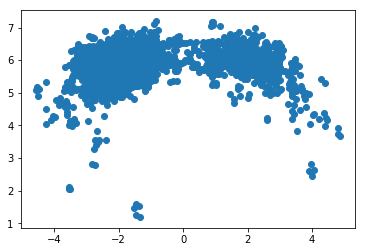

In [9]:
# plot release points
plt.scatter(x = grouped['release_pos_x'], y = grouped['release_pos_z'])

In [10]:
gru.dtypes

player_name       object
pitch_type        object
release_speed    float64
release_pos_x    float64
release_pos_z    float64
pfx_x            float64
pfx_z            float64
dtype: object

In [11]:
# calculate minimal distance for a given player and a given pitch 
def player_sim(df, player_name, pitch):
    df = df.dropna()
    # filter data just for pitch type
    data = df.loc[(df['pitch_type'] == pitch)]
    # filter data to get just frame of pitcher and pitch type 
    pitch = data.loc[(data['player_name'] == player_name)]
    
    # calculate euclidian distance for player and pitch for other players and similar pitches
    data['dist'] = np.sqrt((pitch['release_speed'].iloc[0] - data['release_speed']) ** 2 + (pitch['release_pos_x'].iloc[0] - data['release_pos_x']) ** 2 + (pitch['release_pos_z'].iloc[0] - data['release_pos_z']) ** 2 + (pitch['pfx_x'].iloc[0] - data['pfx_x']) ** 2 + (pitch['pfx_z'].iloc[0] - data['pfx_z']) ** 2)
    return data.sort_values(by = 'dist').head(6)

In [15]:
player_sim(gru, 'Josh Hader', 'FF')

/Users/owenmcgrattan/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,player_name,pitch_type,release_speed,release_pos_x,release_pos_z,pfx_x,pfx_z,dist
1530,Josh Hader,FF,94.65,3.4178,5.1438,0.7695,1.41100,0.000000
48,Adam Conley,FF,95.20,3.3878,5.8016,1.4193,1.07360,1.127909
561,Chris Sale,FF,95.60,3.2814,5.2678,1.2092,0.98100,1.146611
2789,Williams Jerez,FF,95.40,2.6214,5.7279,0.9718,1.21345,1.271958
131,Amir Garrett,FF,95.10,2.3868,5.8625,0.9193,1.13410,1.371534
293,Brad Hand,FF,93.90,2.5859,6.0225,0.8781,1.24150,1.437774
